<a href="https://colab.research.google.com/github/vaishakmk/TedTalk-Analysis/blob/main/yasaswi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from collections import defaultdict
import datetime
from pandas.plotting import parallel_coordinates
from scipy.stats import pearsonr
import re
import csv

%matplotlib inline

In [81]:
speaker_data = pd.read_csv('/content/speaker_data.csv')
talk_data = pd.read_csv('talk_data.csv')
transcript_data = pd.read_csv('/content/transcript_data.csv')




In [82]:
speaker_data.isnull().sum()

talk              141
speaker           145
speaker_title    4433
speaker_occ       789
speaker_bio       764
dtype: int64

In [83]:
speaker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4442 entries, 0 to 4441
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   talk           4301 non-null   object
 1   speaker        4297 non-null   object
 2   speaker_title  9 non-null      object
 3   speaker_occ    3653 non-null   object
 4   speaker_bio    3678 non-null   object
dtypes: object(5)
memory usage: 173.6+ KB


In [84]:
speaker_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4442 entries, 0 to 4441
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   talk           4301 non-null   object
 1   speaker        4297 non-null   object
 2   speaker_title  9 non-null      object
 3   speaker_occ    3653 non-null   object
 4   speaker_bio    3678 non-null   object
dtypes: object(5)
memory usage: 173.6+ KB


In [85]:
speaker_data = speaker_data.dropna(subset=['talk'])

In [86]:
speaker_data.isnull().sum()

talk                0
speaker             4
speaker_title    4292
speaker_occ       648
speaker_bio       623
dtype: int64

In [87]:
speaker_data['speaker_occ'] = speaker_data['speaker_occ'].fillna('Unknown')

In [88]:
speaker_data.isnull().sum()

talk                0
speaker             4
speaker_title    4292
speaker_occ         0
speaker_bio       623
dtype: int64

In [89]:
speaker_data['speaker_bio'] = speaker_data['speaker_bio'].fillna('Unknown')

In [ ]:
speaker_data.isnull().sum()

talk                0
speaker             4
speaker_title    4292
speaker_occ         0
speaker_bio         0
dtype: int64

In [90]:
speaker_data['speaker'] = speaker_data['speaker'].fillna('Unknown')

In [91]:
speaker_data = speaker_data.drop(columns=['speaker_title'])

In [92]:
speaker_data

,talk,speaker,speaker_occ,speaker_bio
0,Can you outsmart the apples and oranges fallacy?,Elizabeth Cox,Unknown,Unknown
1,The exploitation of US college athletes,Tim Nevius,College sports lawyer,Tim Nevius is a leading sports lawyer and coll...
2,How does ultrasound work?,Jacques Abramowicz,Unknown,Unknown
3,"An honest history of an ancient and ""nasty"" word",Kate Lister,Sex historian,Kate Lister is a sex historian and lecturers a...
4,The electrical blueprints that orchestrate life,Michael Levin,Bioelectric explorer,Michael Levin's research could give rise to ad...
...,...,...,...,...
4437,The best stats you've ever seen,Hans Rosling,Global health expert; data visionary,"In Hans Rosling’s hands, data sings. Global tr..."
4438,Do schools kill creativity?,Sir Ken Robinson,"Author, educator",Creativity expert Sir Ken Robinson challenged ...
4439,Greening the ghetto,Majora Carter,Activist for environmental justice,Majora Carter redefined the field of environme...
4440,Simplicity sells,David Pogue,Technology columnist,David Pogue is the personal technology columni...


In [93]:
talk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk_desc     4322 non-null   object
 1   event         4322 non-null   object
 2   talk_name     4322 non-null   object
 3   views         4322 non-null   int64 
 4   duration      4322 non-null   int64 
 5   tags          4322 non-null   object
 6   recorded_at   4322 non-null   object
 7   published on  4322 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 270.2+ KB


In [94]:
talk_data.isnull().sum()

talk_desc       0
event           0
talk_name       0
views           0
duration        0
tags            0
recorded_at     0
published on    0
dtype: int64

In [95]:
transcript_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4442 entries, 0 to 4441
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       4442 non-null   object
 1   transcript  4298 non-null   object
dtypes: object(2)
memory usage: 69.5+ KB


In [96]:
transcript_data.isnull().sum()

title           0
transcript    144
dtype: int64

In [97]:
transcript_data = transcript_data.dropna(subset=['transcript'])


In [98]:
transcript_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4298 entries, 0 to 4441
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   title       4298 non-null   object
 1   transcript  4298 non-null   object
dtypes: object(2)
memory usage: 100.7+ KB


In [99]:
speaker_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4301 entries, 0 to 4441
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   talk         4301 non-null   object
 1   speaker      4301 non-null   object
 2   speaker_occ  4301 non-null   object
 3   speaker_bio  4301 non-null   object
dtypes: object(4)
memory usage: 168.0+ KB


In [100]:
talk_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4322 entries, 0 to 4321
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk_desc     4322 non-null   object
 1   event         4322 non-null   object
 2   talk_name     4322 non-null   object
 3   views         4322 non-null   int64 
 4   duration      4322 non-null   int64 
 5   tags          4322 non-null   object
 6   recorded_at   4322 non-null   object
 7   published on  4322 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 270.2+ KB


In [101]:
final_df = pd.merge(speaker_data, talk_data, how='inner', left_on = 'talk', right_on = 'talk_name')

In [102]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4417
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4418 non-null   object
 1   speaker       4418 non-null   object
 2   speaker_occ   4418 non-null   object
 3   speaker_bio   4418 non-null   object
 4   talk_desc     4418 non-null   object
 5   event         4418 non-null   object
 6   talk_name     4418 non-null   object
 7   views         4418 non-null   int64 
 8   duration      4418 non-null   int64 
 9   tags          4418 non-null   object
 10  recorded_at   4418 non-null   object
 11  published on  4418 non-null   int64 
dtypes: int64(3), object(9)
memory usage: 448.7+ KB


In [103]:
final_df = final_df.drop(columns=['talk_name'])

In [104]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4418 entries, 0 to 4417
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          4418 non-null   object
 1   speaker       4418 non-null   object
 2   speaker_occ   4418 non-null   object
 3   speaker_bio   4418 non-null   object
 4   talk_desc     4418 non-null   object
 5   event         4418 non-null   object
 6   views         4418 non-null   int64 
 7   duration      4418 non-null   int64 
 8   tags          4418 non-null   object
 9   recorded_at   4418 non-null   object
 10  published on  4418 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 414.2+ KB


In [105]:
final_df = pd.merge(final_df, transcript_data, how='inner', left_on = 'talk', right_on = 'title')

In [106]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 0 to 7166
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          7167 non-null   object
 1   speaker       7167 non-null   object
 2   speaker_occ   7167 non-null   object
 3   speaker_bio   7167 non-null   object
 4   talk_desc     7167 non-null   object
 5   event         7167 non-null   object
 6   views         7167 non-null   int64 
 7   duration      7167 non-null   int64 
 8   tags          7167 non-null   object
 9   recorded_at   7167 non-null   object
 10  published on  7167 non-null   int64 
 11  title         7167 non-null   object
 12  transcript    7167 non-null   object
dtypes: int64(3), object(10)
memory usage: 783.9+ KB


In [107]:
final_df = final_df.drop(columns=['title'])

In [108]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7167 entries, 0 to 7166
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   talk          7167 non-null   object
 1   speaker       7167 non-null   object
 2   speaker_occ   7167 non-null   object
 3   speaker_bio   7167 non-null   object
 4   talk_desc     7167 non-null   object
 5   event         7167 non-null   object
 6   views         7167 non-null   int64 
 7   duration      7167 non-null   int64 
 8   tags          7167 non-null   object
 9   recorded_at   7167 non-null   object
 10  published on  7167 non-null   int64 
 11  transcript    7167 non-null   object
dtypes: int64(3), object(9)
memory usage: 727.9+ KB


In [112]:
df = pd.read_csv('/content/talk_data.csv')
df.columns

Index(['talk_desc', 'event', 'talk_name', 'views', 'duration', 'tags',
       'recorded_at', 'published on'],
      dtype='object')

In [114]:
import ast
df['tags'] = df['tags'].apply(lambda x: ast.literal_eval(x))

In [115]:
s = df.apply(lambda x: pd.Series(x['tags']),axis=1).stack().reset_index(level=1, drop=True)
s.name = 'theme'

In [116]:
theme_df = df.drop('tags', axis=1).join(s)
theme_df.head()

,talk_desc,event,talk_name,views,duration,recorded_at,published on,theme
0,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,education
0,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,psychology
0,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,animation
0,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,TED-Ed
0,It's 1997. The United States Senate has called...,TED-Ed,Can you outsmart the apples and oranges fallacy?,119359,327,2021-04-05T00:00:00.000+00:00,1617636753,brain


In [117]:
len(theme_df['theme'].value_counts())

460

In [118]:
pop_themes = pd.DataFrame(theme_df['theme'].value_counts()).reset_index()
pop_themes.columns = ['theme', 'talks']
pop_themes.head(10)

,theme,talks
0,science,1047
1,technology,1017
2,TED-Ed,702
3,culture,692
4,animation,630
5,TEDx,622
6,society,576
7,global issues,575
8,social change,554
9,education,552


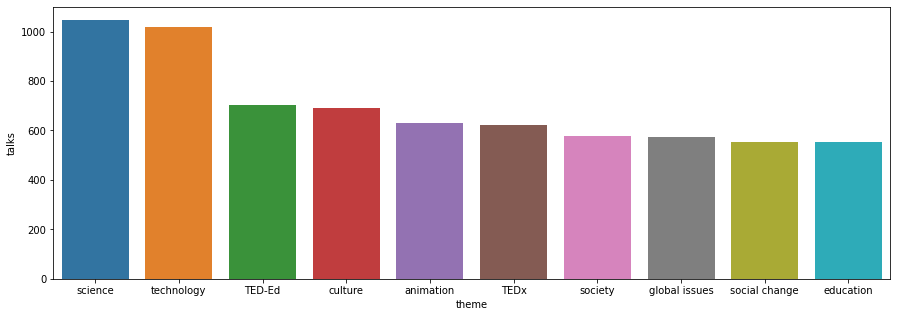

In [119]:
plt.figure(figsize=(15,5))
sns.barplot(x='theme', y='talks', data=pop_themes.head(10))
plt.show()

Index(['talk_desc', 'event', 'talk_name', 'views', 'duration', 'tags',
       'recorded_at', 'published on'],
      dtype='object')